In [1]:
'''Analisis:
- All the data (list = patient with all values)
- BandPower = patient = 12 brain reagions = 5 bands = 1 value
- Lavels structure all patiens with one value = list (no shape)'''

'Analisis:\n- All the data (list = patient with all values)\n- BandPower = patient = 12 brain reagions = 5 bands = 1 value\n- Lavels structure all patiens with one value = list (no shape)'

In [2]:
#Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.
import numpy as np
import matplotlib.pyplot as plt
from numpy import savetxt
import pickle
import csv
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
import random
import sklearn.metrics as sm
import statistics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

import multiprocessing
import xgboost as xgb
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
import warnings
warnings.filterwarnings("ignore")
import datetime
starttime = datetime.datetime.now()
import csv
from scipy import stats
import numpy as np
import collections, numpy

def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg

In [3]:
with open("/Users/laianavarroolivella/Proyectos/EEG/2.banpowerEpoch12BR/list_finalEO.txt", "rb") as fp:   # Unpickling
    withEpoch = pickle.load(fp)

with open("/Users/laianavarroolivella/Proyectos/EEG/1.dataToBrainReagions/sorted_list_EO.txt", "rb") as fp:   # Unpickling
    sorted_list_EC_up = pickle.load(fp)

In [4]:
#Import the data to analise
#Open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Proyectos/EEG/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_wellBeing = data['TeiQueSF_well_being']
TeiQueSF_total = data['TeiQueSF_total']

In [5]:
xCorr = []
for e in range(0,len(sorted_list_EC_up)):       #For each frequency band:
    hename = sorted_list_EC_up[e]   #Select the name of the patient
    hename = str(hename[:-7])  #Select only the number witout the extension 
    if hename in names:    #If this is in the testNames:
        indices = [i for i, s in enumerate(names) if hename in s] #Get the position of the testNames
        x = (float(TeiQueSF_wellBeing[int(indices[0])])) #Get the value of the patient in the test selected
        xCorr.append(x) #Add it in to the xCorr
    else:
        print("No esta"+hename)

In [6]:
#Epoch (samples data point) all incluede for each subject <- + band + brain region (concatenated)

#All Epochs ! Majoriti points <- find a ave

a = np.array(withEpoch)[3:,:,:] #3 because in the stadistical analisis the 3 fist brain reagions dosent show good results
print(a.shape)
b = a.T
print(b.shape)
c2 = b.reshape(187,45)
print(c2.shape)

(9, 5, 187)
(187, 5, 9)
(187, 45)


In [7]:
#Lavels
Y = np.array(xCorr)
print(type(Y))
print(Y.shape)

<class 'numpy.ndarray'>
(187,)


KNeighborsClassifier

**************************************************** 0.1
     --
Counter({1: 63, 0: 54})
     Pred:  [0 0 0 1 0 0 0 0 1 0 0 1 1]
     Data:  [0 0 1 1 0 1 0 0 1 1 1 1 0]
     ACC 0.6153846153846154
     F1 0.5454545454545454
     Recal 0.42857142857142855
     Precision 0.75
     --
Counter({1: 65, 0: 52})
     Pred:  [0 1 0 0 0 0 1 1 0 1 1 0 0]
     Data:  [0 0 0 1 1 1 1 0 0 0 0 0 1]
     ACC 0.38461538461538464
     F1 0.20000000000000004
     Recal 0.2
     Precision 0.2
     --
Counter({1: 64, 0: 53})
     Pred:  [0 1 0 0 1 0 1 0 1 1 1 1 0]
     Data:  [0 1 0 1 1 1 0 0 0 0 0 1 1]
     ACC 0.46153846153846156
     F1 0.4615384615384615
     Recal 0.5
     Precision 0.42857142857142855
     --
Counter({1: 64, 0: 53})
     Pred:  [0 0 1 1 0 1 1 1 1 1 0 1 0]
     Data:  [1 1 0 0 0 0 1 1 0 1 1 0 0]
     ACC 0.38461538461538464
     F1 0.42857142857142855
     Recal 0.5
     Precision 0.375
     --
Counter({1: 62, 0: 55})
     Pred:  [0 1 1 1 1 0 0 0 0 0 1 0 0]
     Data:  [1 0 0 0 1 1 1 

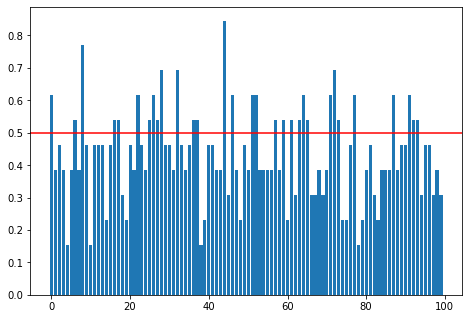

0.4361538461538461
**************************************************** 0.2
     --
Counter({1: 55, 0: 49})
     Pred:  [0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1]
     Data:  [0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0]
     ACC 0.5
     F1 0.5185185185185186
     Recal 0.4666666666666667
     Precision 0.5833333333333334
     --
Counter({1: 58, 0: 46})
     Pred:  [0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1]
     Data:  [0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0]
     ACC 0.34615384615384615
     F1 0.32
     Recal 0.3333333333333333
     Precision 0.3076923076923077
     --
Counter({1: 55, 0: 49})
     Pred:  [1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1]
     Data:  [1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1]
     ACC 0.46153846153846156
     F1 0.5625
     Recal 0.6
     Precision 0.5294117647058824
     --
Counter({1: 58, 0: 46})
     Pred:  [1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1]
     Data:  [0 0 0 1 1 1 0 0 1 

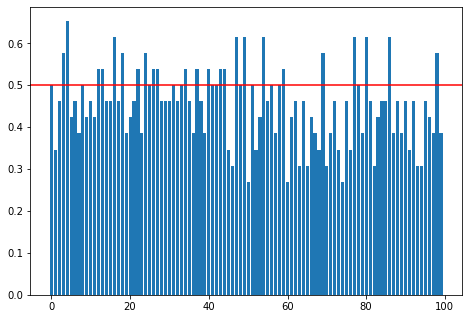

0.45499999999999985
**************************************************** 0.3
     --
Counter({0: 46, 1: 45})
     Pred:  [1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1
 0 0]
     Data:  [1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0
 0 1]
     ACC 0.38461538461538464
     F1 0.42857142857142855
     Recal 0.36
     Precision 0.5294117647058824
     --
Counter({1: 53, 0: 38})
     Pred:  [0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 0]
     Data:  [1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0
 0 0]
     ACC 0.3076923076923077
     F1 0.27027027027027023
     Recal 0.29411764705882354
     Precision 0.25
     --
Counter({1: 46, 0: 45})
     Pred:  [0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0
 0 1]
     Data:  [0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1
 0 1]
     ACC 0.5897435897435898
     F1 0.619047619047619
 

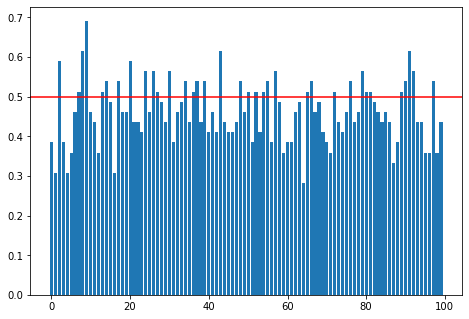

0.46384615384615363
**************************************************** 0.4
     --
Counter({0: 40, 1: 38})
     Pred:  [1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1]
     Data:  [1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1
 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1]
     ACC 0.46153846153846156
     F1 0.44000000000000006
     Recal 0.34375
     Precision 0.6111111111111112
     --
Counter({0: 39, 1: 39})
     Pred:  [1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
     Data:  [0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1]
     ACC 0.5384615384615384
     F1 0.47826086956521735
     Recal 0.3548387096774194
     Precision 0.7333333333333333
     --
Counter({1: 43, 0: 35})
     Pred:  [0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0
 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1]
  

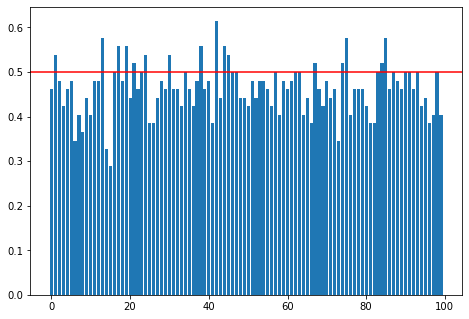

0.4632692307692306


In [8]:

xin = list(range(100))
th=5.5
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = neighbors.KNeighborsClassifier()           
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [9]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.4361538461538461
F1 0.44163388872908954
rec 0.4597611832611831
pres 0.4622557720057721
 
Av 0.45499999999999985
F1 0.4785053646572183
rec 0.4816664580259781
pres 0.5074874536368342
 
Av 0.46384615384615363
F1 0.4966793737304062
rec 0.4985071835685141
pres 0.5172769516941224
 
Av 0.4632692307692306
F1 0.48584074635224844
rec 0.4875173699074219
pres 0.504799332586411
 


XGBClassifier

**************************************************** 0.1
     --
Counter({1: 61, 0: 56})
     Pred:  [0 0 0 0 0 0 0 1 1 0 0 1 0]
     Data:  [1 0 0 1 0 1 1 1 1 1 1 1 0]
     ACC 0.5384615384615384
     F1 0.5
     Recal 0.3333333333333333
     Precision 1.0
     --
Counter({1: 62, 0: 55})
     Pred:  [1 0 1 0 1 0 0 1 1 1 0 1 0]
     Data:  [0 0 1 1 1 1 1 0 1 1 0 1 0]
     ACC 0.6153846153846154
     F1 0.6666666666666666
     Recal 0.625
     Precision 0.7142857142857143
     --
Counter({1: 61, 0: 56})
     Pred:  [0 0 0 1 0 1 0 0 0 1 0 0 0]
     Data:  [1 1 1 1 1 0 1 0 1 0 0 1 1]
     ACC 0.23076923076923078
     F1 0.16666666666666666
     Recal 0.1111111111111111
     Precision 0.3333333333333333
     --
Counter({1: 62, 0: 55})
     Pred:  [1 0 0 0 0 1 1 1 1 0 0 1 0]
     Data:  [1 0 0 0 1 0 1 1 1 1 0 1 1]
     ACC 0.6923076923076923
     F1 0.7142857142857143
     Recal 0.625
     Precision 0.8333333333333334
     --
Counter({1: 68, 0: 49})
     Pred:  [0 0 1 0 0 1 1 0 1 0 1 0 0]
 

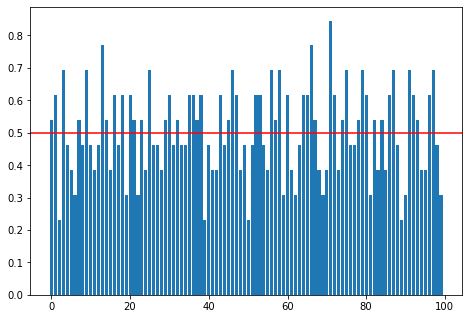

0.5038461538461538
**************************************************** 0.2
     --
Counter({1: 54, 0: 50})
     Pred:  [1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0]
     Data:  [1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1]
     ACC 0.5769230769230769
     F1 0.6666666666666667
     Recal 0.6875
     Precision 0.6470588235294118
     --
Counter({1: 58, 0: 46})
     Pred:  [0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1]
     Data:  [0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1]
     ACC 0.5
     F1 0.5185185185185186
     Recal 0.5833333333333334
     Precision 0.4666666666666667
     --
Counter({1: 58, 0: 46})
     Pred:  [0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1]
     Data:  [1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1]
     ACC 0.5
     F1 0.43478260869565216
     Recal 0.4166666666666667
     Precision 0.45454545454545453
     --
Counter({1: 57, 0: 47})
     Pred:  [1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1]
     Data:  [1 0 

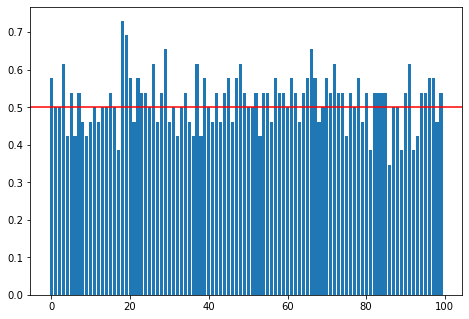

0.5176923076923081
**************************************************** 0.3
     --
Counter({1: 47, 0: 44})
     Pred:  [1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 0]
     Data:  [0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1
 1 1]
     ACC 0.4358974358974359
     F1 0.5217391304347826
     Recal 0.5217391304347826
     Precision 0.5217391304347826
     --
Counter({1: 46, 0: 45})
     Pred:  [1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1
 1 1]
     Data:  [1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1
 1 1]
     ACC 0.5897435897435898
     F1 0.68
     Recal 0.7083333333333334
     Precision 0.6538461538461539
     --
Counter({1: 50, 0: 41})
     Pred:  [0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1
 0 1]
     Data:  [1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1
 0 0]
     ACC 0.48717948717948717
     F1 0.5454545

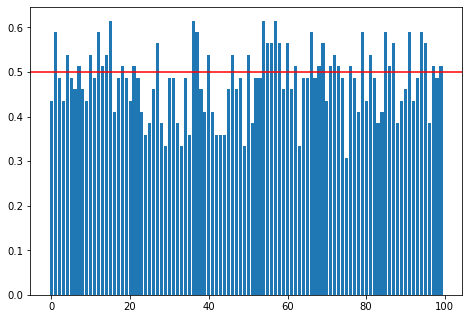

0.48128205128205126
**************************************************** 0.4
     --
Counter({1: 47, 0: 31})
     Pred:  [1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0]
     Data:  [0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1]
     ACC 0.4807692307692308
     F1 0.5423728813559322
     Recal 0.6956521739130435
     Precision 0.4444444444444444
     --
Counter({1: 40, 0: 38})
     Pred:  [0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1]
     Data:  [0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0
 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1]
     ACC 0.38461538461538464
     F1 0.33333333333333337
     Recal 0.26666666666666666
     Precision 0.4444444444444444
     --
Counter({1: 46, 0: 32})
     Pred:  [1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0
 0 0 1 1 0 1 0 1 0 1 0 

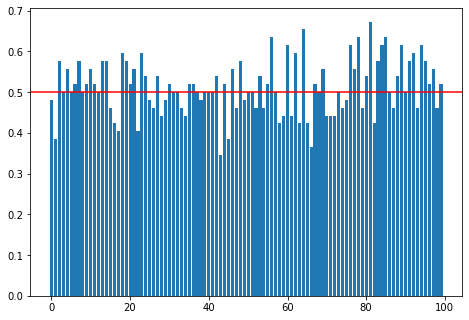

0.5121153846153844


In [10]:
xin = list(range(100))
th=5.5
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = xgb.XGBClassifier(max_depth=6,learning_rate=0.1,n_estimators=50,
                                            objective='binary:logistic',booster='gbtree',n_jobs=20,
                                            subsample=0.9, colsample_bytree=0.9, colsample_bylevel=0.9,
                                            reg_alpha=0.5, reg_lambda=1.0,gamma=0,
                                            scale_pos_weight=1)           
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [11]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.5038461538461538
F1 0.5372258908102561
rec 0.577456349206349
pres 0.5444957264957264
 
Av 0.5176923076923081
F1 0.5632192219997664
rec 0.5986116014188771
pres 0.5528234142018971
 
Av 0.48128205128205126
F1 0.5283166718830319
rec 0.5557189654613096
pres 0.5275047237610299
 
Av 0.5121153846153844
F1 0.55862705493204
rec 0.588729052206195
pres 0.5508766457603838
 


Random forest classifier

**************************************************** 0.1
     --
Counter({1: 67, 0: 50})
     Pred:  [0 1 1 1 1 0 1 1 1 0 1 1 1]
     Data:  [0 0 0 0 0 1 0 1 0 0 1 0 0]
     ACC 0.3076923076923077
     F1 0.30769230769230765
     Recal 0.6666666666666666
     Precision 0.2
     --
Counter({1: 63, 0: 54})
     Pred:  [1 0 0 0 1 0 0 1 0 0 0 1 0]
     Data:  [1 1 1 0 0 0 1 1 0 0 0 1 1]
     ACC 0.6153846153846154
     F1 0.5454545454545454
     Recal 0.42857142857142855
     Precision 0.75
     --
Counter({1: 65, 0: 52})
     Pred:  [1 0 0 1 1 1 0 0 0 1 1 0 0]
     Data:  [0 1 0 1 0 1 0 0 1 0 0 1 0]
     ACC 0.46153846153846156
     F1 0.3636363636363636
     Recal 0.4
     Precision 0.3333333333333333
     --
Counter({1: 63, 0: 54})
     Pred:  [1 0 0 0 1 0 1 1 0 0 1 1 1]
     Data:  [1 1 0 0 1 0 0 1 1 1 0 1 0]
     ACC 0.5384615384615384
     F1 0.5714285714285714
     Recal 0.5714285714285714
     Precision 0.5714285714285714
     --
Counter({1: 64, 0: 53})
     Pred:  [0 1 1 0 1 0 0 1

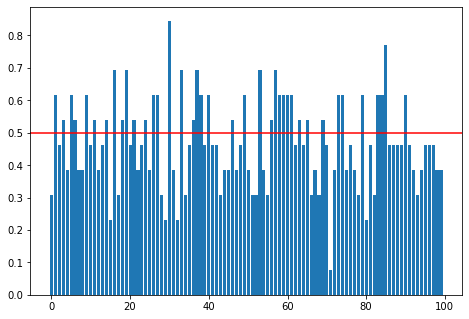

0.4715384615384614
**************************************************** 0.2
     --
Counter({1: 59, 0: 45})
     Pred:  [1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0]
     Data:  [1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1]
     ACC 0.46153846153846156
     F1 0.5
     Recal 0.6363636363636364
     Precision 0.4117647058823529
     --
Counter({1: 55, 0: 49})
     Pred:  [1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0]
     Data:  [0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0]
     ACC 0.3076923076923077
     F1 0.3571428571428571
     Recal 0.3333333333333333
     Precision 0.38461538461538464
     --
Counter({1: 56, 0: 48})
     Pred:  [1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0]
     Data:  [1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0]
     ACC 0.46153846153846156
     F1 0.5625000000000001
     Recal 0.6428571428571429
     Precision 0.5
     --
Counter({1: 57, 0: 47})
     Pred:  [0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0]
    

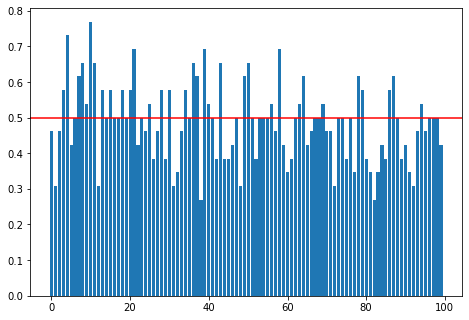

0.4873076923076921
**************************************************** 0.3
     --
Counter({1: 52, 0: 39})
     Pred:  [0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0
 0 0]
     Data:  [0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1
 1 0]
     ACC 0.5384615384615384
     F1 0.55
     Recal 0.6111111111111112
     Precision 0.5
     --
Counter({1: 47, 0: 44})
     Pred:  [1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1
 0 0]
     Data:  [1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1
 1 0]
     ACC 0.4358974358974359
     F1 0.5
     Recal 0.4782608695652174
     Precision 0.5238095238095238
     --
Counter({1: 47, 0: 44})
     Pred:  [0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1
 0 1]
     Data:  [1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 1 0]
     ACC 0.38461538461538464
     F1 0.4545454545454545
     Recal 0.4347826

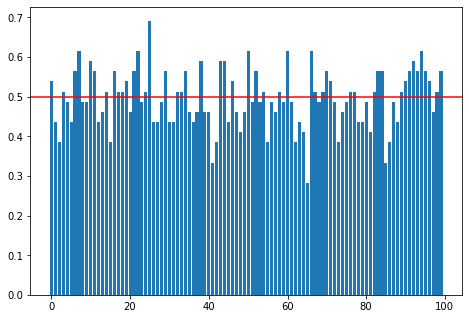

0.4958974358974356
**************************************************** 0.4
     --
Counter({1: 41, 0: 37})
     Pred:  [0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1]
     Data:  [0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
     ACC 0.36538461538461536
     F1 0.32653061224489793
     Recal 0.27586206896551724
     Precision 0.4
     --
Counter({1: 49, 0: 29})
     Pred:  [1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0]
     Data:  [1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1]
     ACC 0.46153846153846156
     F1 0.44
     Recal 0.5238095238095238
     Precision 0.3793103448275862
     --
Counter({1: 46, 0: 32})
     Pred:  [1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1]
     Data:  [0 0 0 0

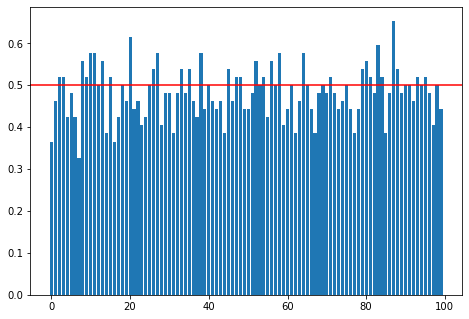

0.48211538461538467


In [12]:
xin = list(range(100))
th=5.5
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = RandomForestClassifier(max_depth=30, random_state=0)       
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [13]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.4715384615384614
F1 0.47149444346503144
rec 0.4979303751803751
pres 0.49255519480519483
 
Av 0.4873076923076921
F1 0.5099130990149415
rec 0.5243194974959683
pres 0.5189808469823951
 
Av 0.4958974358974356
F1 0.5326422501703665
rec 0.5422045601632196
pres 0.5402935981649061
 
Av 0.48211538461538467
F1 0.5148530337520146
rec 0.5278847111373346
pres 0.522958448190044
 


gaussian nb

**************************************************** 0.1
     --
Counter({1: 66, 0: 51})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1]
     Data:  [1 0 0 1 1 0 0 0 1 0 0 0 0]
     ACC 0.3076923076923077
     F1 0.47058823529411764
     Recal 1.0
     Precision 0.3076923076923077
     --
Counter({1: 61, 0: 56})
     Pred:  [1 1 0 0 0 0 1 1 1 1 1 1 0]
     Data:  [0 1 0 1 1 1 1 1 0 1 1 1 0]
     ACC 0.6153846153846154
     F1 0.7058823529411765
     Recal 0.6666666666666666
     Precision 0.75
     --
Counter({1: 66, 0: 51})
     Pred:  [1 1 1 1 0 0 1 1 1 1 1 1 1]
     Data:  [0 0 0 0 0 0 1 0 0 1 1 1 0]
     ACC 0.46153846153846156
     F1 0.5333333333333333
     Recal 1.0
     Precision 0.36363636363636365
     --
Counter({1: 65, 0: 52})
     Pred:  [1 1 1 1 0 1 1 1 0 1 1 1 0]
     Data:  [0 1 0 1 1 0 0 1 0 1 0 0 0]
     ACC 0.46153846153846156
     F1 0.5333333333333333
     Recal 0.8
     Precision 0.4
     --
Counter({1: 67, 0: 50})
     Pred:  [0 0 1 0 1 1 1 0 1 1 1 1 0]
     Data:  [0 0 

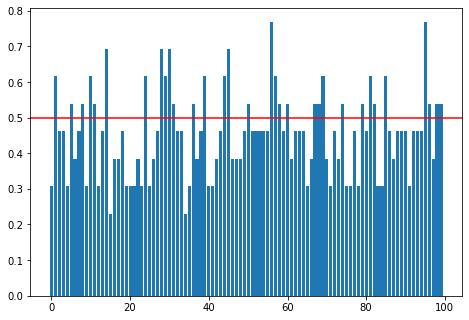

0.45692307692307665
**************************************************** 0.2
     --
Counter({1: 59, 0: 45})
     Pred:  [1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0]
     Data:  [1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0]
     ACC 0.34615384615384615
     F1 0.45161290322580644
     Recal 0.6363636363636364
     Precision 0.35
     --
Counter({1: 54, 0: 50})
     Pred:  [0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1]
     Data:  [0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0]
     ACC 0.38461538461538464
     F1 0.4666666666666667
     Recal 0.4375
     Precision 0.5
     --
Counter({1: 54, 0: 50})
     Pred:  [1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1]
     Data:  [1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0]
     ACC 0.6153846153846154
     F1 0.7222222222222223
     Recal 0.8125
     Precision 0.65
     --
Counter({1: 52, 0: 52})
     Pred:  [1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1]
     Data:  [1 1 1 0 1 0 0 1 0 1 0 1 1 1

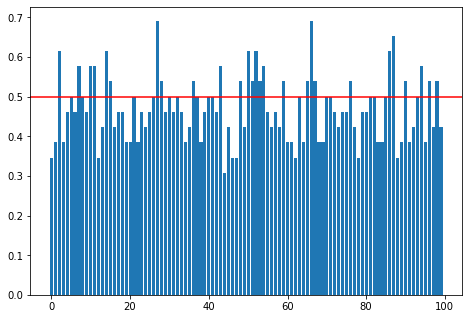

0.47115384615384615
**************************************************** 0.3
     --
Counter({1: 50, 0: 41})
     Pred:  [0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1]
     Data:  [1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1
 0 0]
     ACC 0.38461538461538464
     F1 0.47826086956521735
     Recal 0.55
     Precision 0.4230769230769231
     --
Counter({1: 47, 0: 44})
     Pred:  [0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 1 0]
     Data:  [1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0
 1 0]
     ACC 0.48717948717948717
     F1 0.411764705882353
     Recal 0.30434782608695654
     Precision 0.6363636363636364
     --
Counter({1: 52, 0: 39})
     Pred:  [0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 1 0]
     Data:  [0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1
 1 1]
     ACC 0.41025641025641024
     F1 0.488

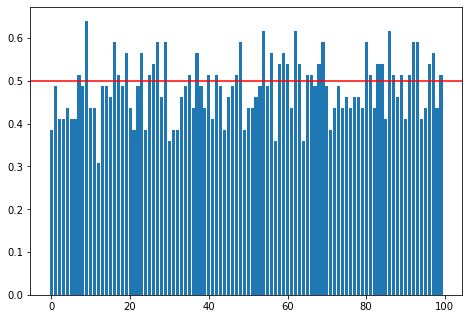

0.4825641025641025
**************************************************** 0.4
     --
Counter({0: 40, 1: 38})
     Pred:  [0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
     Data:  [1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1]
     ACC 0.4423076923076923
     F1 0.4313725490196078
     Recal 0.34375
     Precision 0.5789473684210527
     --
Counter({1: 41, 0: 37})
     Pred:  [1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1
 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1]
     Data:  [1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0]
     ACC 0.40384615384615385
     F1 0.507936507936508
     Recal 0.5517241379310345
     Precision 0.47058823529411764
     --
Counter({1: 40, 0: 38})
     Pred:  [1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1]
     

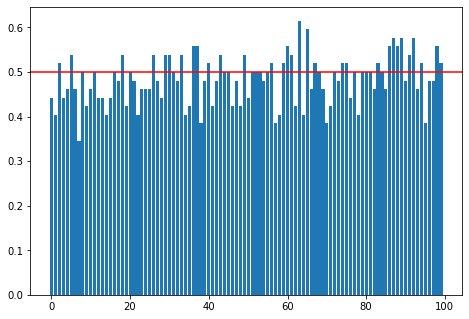

0.4834615384615384


In [14]:
xin = list(range(100))
th=5.5
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = GaussianNB()       
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [15]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.45692307692307665
F1 0.5319891711315856
rec 0.6297225829725829
pres 0.5009703907203906
 
Av 0.47115384615384615
F1 0.5511510871834242
rec 0.6429723053863922
pres 0.5194151093858356
 
Av 0.4825641025641025
F1 0.5401332815287757
rec 0.6033491616344209
pres 0.5365530277535159
 
Av 0.4834615384615384
F1 0.54766756241635
rec 0.6179218326071907
pres 0.5345359168892434
 
